# Recommending Similar Movie based on Users Watched History

TMDB.org is a crowd-sourced movie information database used by many film-related consoles, sites and apps, such as XBMC, MythTV and Plex. 

Dozens of media managers, mobile apps and social sites make use of its API.

TMDb lists some 80,000 films at time of writing, which is considerably fewer than IMDb. 

While not as complete as IMDb, it holds extensive information for most popular/Hollywood films.

This is dataset of the 10,000 most popular movies across the world has been fetched through the read API.

TMDB's free API provides for developers and their team to programmatically fetch and use TMDb's data.

Their API is to use as long as you attribute TMDb as the source of the data and/or images. 

Also, they update their API from time to time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("TMDb_updated.csv")

In [3]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True) # drop un-used column

In [4]:
df.shape

# contains 10000 rows x 5 columns

(10000, 5)

In [5]:
df.info()

# some missing data in overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              10000 non-null  object 
 1   overview           9970 non-null   object 
 2   original_language  10000 non-null  object 
 3   vote_count         10000 non-null  int64  
 4   vote_average       10000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


In [6]:
df.head()

,title,overview,original_language,vote_count,vote_average
0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [7]:
df.isnull().sum()

title                 0
overview             30
original_language     0
vote_count            0
vote_average          0
dtype: int64

In [8]:
df = df.dropna() 

# drop 30 null columns

In [9]:
df.shape

(9970, 5)

In [10]:
df['original_language'].unique()

array(['en', 'fr', 'es', 'tr', 'ko', 'tl', 'ja', 'it', 'id', 'ru', 'pl',
       'cn', 'da', 'hi', 'sv', 'zh', 'no', 'lv', 'ro', 'ar', 'el', 'ta',
       'sq', 'de', 'ml', 'th', 'nl', 'pt', 'sr', 'mk', 'te', 'xx', 'hu',
       'is', 'sh', 'fa', 'cs', 'la', 'he', 'pa', 'nb', 'bs', 'eu', 'fi',
       'af', 'ab', 'ka', 'ms', 'mr', 'et', 'uk'], dtype=object)

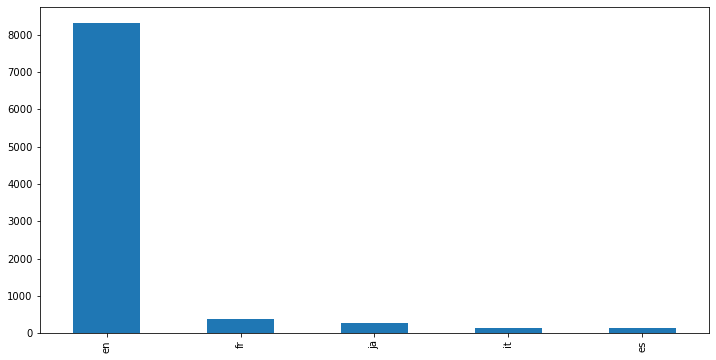

In [11]:
plt.figure(figsize=(12,6))
df['original_language'].value_counts().head(5).plot(kind="bar");

In [12]:
df1 = df.groupby('original_language').sum()

In [13]:
df1

,vote_count,vote_average
original_language,,
ab,1,8.0
af,181,13.1
ar,870,37.4
bs,227,7.7
cn,19704,485.6
cs,473,29.7
da,11739,219.8
de,38101,665.2
el,1181,14.3


In [14]:
df['vote_average'].describe()

count    9970.000000
mean        6.316028
std         1.331982
min         0.000000
25%         5.800000
50%         6.500000
75%         7.100000
max        10.000000
Name: vote_average, dtype: float64

In [15]:
df['vote_count'].describe()

count     9970.000000
mean      1023.820662
std       1994.548401
min          0.000000
25%        144.000000
50%        334.000000
75%        929.750000
max      25148.000000
Name: vote_count, dtype: float64

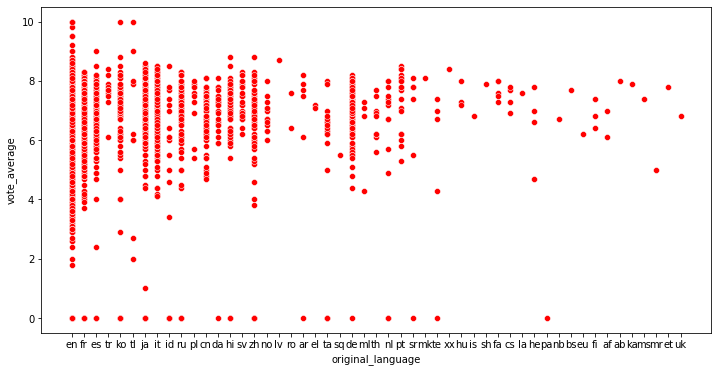

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='original_language',y='vote_average',data=df,color='red');

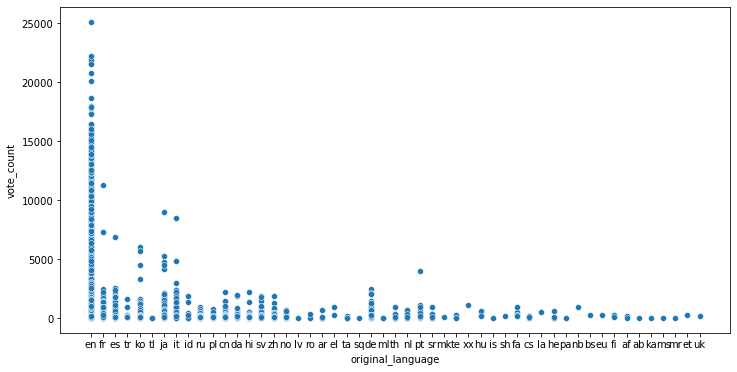

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='original_language',y='vote_count',data=df);

# NATURAL LANGUAGE PROCESSING (NLP)

To convert string data into numerical data one can use following methods

· Bag of words
· TFIDF

**Understanding Bag of Words vs TFIDF through cosine similarity**

https://youtu.be/hc3DCn8viWs

## Bag of Words (BoW)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
df_bow = CountVectorizer()

# to run BoW in python, can use Count Vectorizer

In [20]:
count_vec = df_bow.fit_transform(df['overview'])

In [21]:
df_bow = pd.DataFrame(count_vec.toarray(),columns = df_bow.get_feature_names())
df_bow.index  = df['title']
df_bow

# return the frequency / count of each words in overview

,00,000,006,007,01,05pm,10,100,1000,100th,...,échard,éclair,édouard,émigré,état,étienne,öztürk,žižek,βwzvz,運轉手之戀
title,,,,,,,,,,,,,,,,,,,,,
Ad Astra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bloodshot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bad Boys for Life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ant-Man,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percy Jackson: Sea of Monsters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cargo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Good Night,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The World Is Yours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.metrics.pairwise import cosine_similarity # import cosine similarity from sklearn

In [23]:
cos = cosine_similarity(df_bow) 

In [24]:
df_cos = pd.DataFrame(cos, index = df_bow.index, columns = df_bow.index)
df_cos

# create a dataframe (title vs title where the value is cosine similarity)
# return the value of cosine similarity for each title

title,Ad Astra,Bloodshot,Bad Boys for Life,Ant-Man,Percy Jackson: Sea of Monsters,Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn),Live Free or Die Hard,Cold Blood,Underwater,The Platform,...,Attack on Titan,Pokémon: The Rise of Darkrai,Eagle vs Shark,High Flying Bird,Zapped!,Cargo,The Good Night,The World Is Yours,The Grand Seduction,Woochi: The Demon Slayer
title,,,,,,,,,,,,,,,,,,,,,
Ad Astra,1.000000,0.375873,0.488824,0.369274,0.473365,0.160817,0.356873,0.308789,0.374095,0.089217,...,0.312772,0.492366,0.406625,0.080257,0.186420,0.446709,0.230417,0.207390,0.486259,0.220707
Bloodshot,0.375873,1.000000,0.320389,0.364351,0.339675,0.151117,0.413595,0.439202,0.206333,0.053894,...,0.166547,0.294950,0.337011,0.186655,0.287493,0.221144,0.483270,0.306938,0.294848,0.152718
Bad Boys for Life,0.488824,0.320389,1.000000,0.324918,0.397573,0.117917,0.279117,0.185249,0.300537,0.067286,...,0.244624,0.379071,0.354205,0.052963,0.159203,0.373878,0.121644,0.159669,0.399597,0.158888
Ant-Man,0.369274,0.364351,0.324918,1.000000,0.349603,0.138566,0.263568,0.326534,0.252262,0.042359,...,0.179664,0.318182,0.297309,0.177822,0.170075,0.277613,0.306314,0.268044,0.365902,0.200049
Percy Jackson: Sea of Monsters,0.473365,0.339675,0.397573,0.349603,1.000000,0.193773,0.307148,0.304420,0.352767,0.118470,...,0.233299,0.413167,0.327569,0.155417,0.152894,0.286943,0.285569,0.240966,0.412188,0.217584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cargo,0.446709,0.221144,0.373878,0.277613,0.286943,0.105129,0.342166,0.181676,0.325363,0.119979,...,0.354406,0.325893,0.325363,0.000000,0.154842,1.000000,0.119298,0.162690,0.356263,0.141658
The Good Night,0.230417,0.483270,0.121644,0.306314,0.285569,0.266796,0.342076,0.363255,0.145712,0.126867,...,0.115309,0.245051,0.339995,0.299581,0.283802,0.119298,1.000000,0.309655,0.191783,0.159776
The World Is Yours,0.207390,0.306938,0.159669,0.268044,0.240966,0.133407,0.271378,0.157189,0.091077,0.071368,...,0.086488,0.172314,0.136615,0.149801,0.163743,0.162690,0.309655,1.000000,0.102748,0.112351


In [25]:
df_cos.loc['Ant-Man'].sort_values(ascending=False).head()

title
Ant-Man                                1.000000
Downfall                               0.517324
Cloudy with a Chance of Meatballs 2    0.504421
Iron Man 2                             0.501859
The Jungle Book 2                      0.499093
Name: Ant-Man, dtype: float64

In [26]:
print(f"Let's suppose the user watched 'Ant-Man', the most similar movies \
that can be recommended based on movie's overview are:{df_cos.loc['Ant-Man'].sort_values(ascending=False).head()[1:].index}")

# sort the cosine value descendingly and return only few highest title (this example only return 5 title with highest cosine value)
# [:1].index  - to only return the index without the first title, which would be the user watched title as it has value of 1

Let's suppose the user watched 'Ant-Man', the most similar movies that can be recommended based on movie's overview are:Index(['Downfall', 'Cloudy with a Chance of Meatballs 2', 'Iron Man 2',
       'The Jungle Book 2'],
      dtype='object', name='title')


Disadvantages of Bag of Words

- it took account all the text includes 'the' and etc.
- cosine similarity only took account the frequency of similar text 

## TF-IDF

**Text Data Vectorization**

https://medium.com/@paritosh_30025/natural-language-processing-text-data-vectorization-af2520529cf7

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer # import TfidfVectorizer form sklearn

In [28]:
dfv = TfidfVectorizer()

**TFIDF Vectorizer Parameters**

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [29]:
dfv

TfidfVectorizer()

In [30]:
vectorized_data = dfv.fit_transform(df['overview']) 

# fit and transform string data to 0 and 1 based on how frequent the text in the overview appeared

In [31]:
vectorized_data.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
dfv = pd.DataFrame(vectorized_data.toarray(),columns = dfv.get_feature_names())
dfv.index  = df['title']
dfv

# create a data frame where title vs vectorized data value

,00,000,006,007,01,05pm,10,100,1000,100th,...,échard,éclair,édouard,émigré,état,étienne,öztürk,žižek,βwzvz,運轉手之戀
title,,,,,,,,,,,,,,,,,,,,,
Ad Astra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bloodshot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bad Boys for Life,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ant-Man,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percy Jackson: Sea of Monsters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cargo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Good Night,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The World Is Yours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Cosine Similarity**

- to know which documents had similar meaning (calculate the vectorize data through cosine similarity) 

In [33]:
from sklearn.metrics.pairwise import cosine_similarity # import cosine similarity from sklearn

In [34]:
cos = cosine_similarity(dfv) 

In [36]:
df_cos = pd.DataFrame(cos, index = dfv.index, columns = dfv.index)
df_cos

# create a dataframe (title vs title where the value is cosine similarity)

title,Ad Astra,Bloodshot,Bad Boys for Life,Ant-Man,Percy Jackson: Sea of Monsters,Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn),Live Free or Die Hard,Cold Blood,Underwater,The Platform,...,Attack on Titan,Pokémon: The Rise of Darkrai,Eagle vs Shark,High Flying Bird,Zapped!,Cargo,The Good Night,The World Is Yours,The Grand Seduction,Woochi: The Demon Slayer
title,,,,,,,,,,,,,,,,,,,,,
Ad Astra,1.000000,0.057448,0.039378,0.030825,0.041963,0.016535,0.046453,0.037736,0.066821,0.043131,...,0.035697,0.078148,0.034693,0.005792,0.018313,0.082231,0.036572,0.029626,0.049580,0.017905
Bloodshot,0.057448,1.000000,0.043999,0.053921,0.040258,0.025874,0.095491,0.112013,0.022313,0.008684,...,0.015091,0.029957,0.054596,0.079996,0.060283,0.027232,0.141562,0.055096,0.039612,0.037194
Bad Boys for Life,0.039378,0.043999,1.000000,0.055033,0.059499,0.026961,0.021911,0.013804,0.019986,0.005746,...,0.013561,0.026265,0.035012,0.003289,0.014726,0.026529,0.011268,0.038182,0.030499,0.010821
Ant-Man,0.030825,0.053921,0.055033,1.000000,0.032641,0.025234,0.023586,0.059754,0.043080,0.006350,...,0.012524,0.040804,0.023339,0.045606,0.016373,0.026426,0.041928,0.033970,0.094209,0.043160
Percy Jackson: Sea of Monsters,0.041963,0.040258,0.059499,0.032641,1.000000,0.024286,0.047518,0.033588,0.035535,0.021811,...,0.014903,0.048882,0.030088,0.018891,0.012237,0.023330,0.039293,0.027776,0.036163,0.016116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cargo,0.082231,0.027232,0.026529,0.026426,0.023330,0.025613,0.053103,0.017017,0.058280,0.035218,...,0.035456,0.060721,0.037701,0.000000,0.021353,1.000000,0.022040,0.049720,0.027841,0.023151
The Good Night,0.036572,0.141562,0.011268,0.041928,0.039293,0.057027,0.090684,0.101673,0.029771,0.056492,...,0.015147,0.043638,0.067445,0.072967,0.065049,0.022040,1.000000,0.054458,0.032004,0.018000
The World Is Yours,0.029626,0.055096,0.038182,0.033970,0.027776,0.047842,0.038064,0.020701,0.007301,0.010106,...,0.011745,0.016899,0.014535,0.017036,0.027390,0.049720,0.054458,1.000000,0.008700,0.008135


In [37]:
df_cos.loc['Ant-Man'].sort_values(ascending=False).head()

title
Ant-Man                   1.000000
Ant-Man and the Wasp      0.271862
Rocky III                 0.204147
It Could Happen to You    0.167846
Lying and Stealing        0.151659
Name: Ant-Man, dtype: float64

In [38]:
print(f"Let's suppose the user watched 'Ant-Man', the most similar movies \
that can be recommended based on movie's overview are:{df_cos.loc['Ant-Man'].sort_values(ascending=False).head()[1:].index}")

# sort the cosine value descendingly and return only few highest title (this example only return 5 title with highest cosine value)
# [:1].index  - to only return the index without the first title, which would be the user watched title as it has value of 1

Let's suppose the user watched 'Ant-Man', the most similar movies that can be recommended based on movie's overview are:Index(['Ant-Man and the Wasp', 'Rocky III', 'It Could Happen to You',
       'Lying and Stealing'],
      dtype='object', name='title')


Advantages of TF-IDF

- easy to get document similarity
- keep relevants words in scoring
- lower just frequent word score (higher the frequency of certain document, lower the score for that document)

Disadvantages of TF-IDF

- weak on capture the document topic
- weak handling synonym